# MNIST

In [20]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from emnist import extract_test_samples
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import os

- Load data

In [21]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

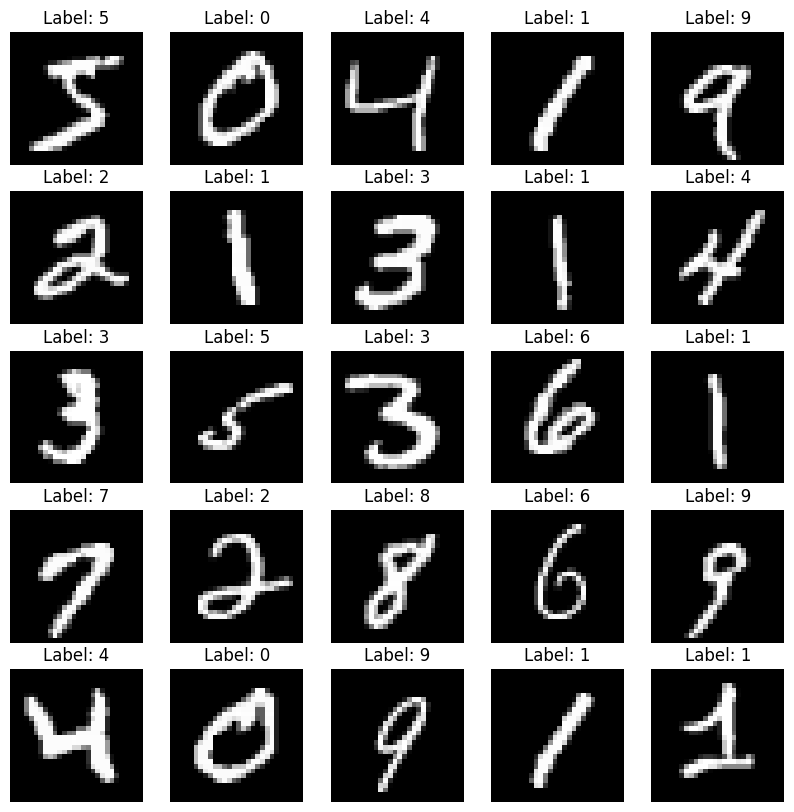

In [22]:
# Display some random images from the training set
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.show()

In [51]:
# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

- Creating Tensorflow model

In [52]:
# Build the CNN model
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [53]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [54]:
# Train the model on the MNIST dataset
model.fit(train_images, train_labels, epochs=20, batch_size=64, validation_split=0.2)


Epoch 1/20


750/750 [==============================] - 3s 3ms/step - loss: 3.5041 - accuracy: 0.8500 - val_loss: 0.6495 - val_accuracy: 0.8824
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 0.4981 - accuracy: 0.9027 - val_loss: 0.4299 - val_accuracy: 0.9175
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3225 - accuracy: 0.9266 - val_loss: 0.4165 - val_accuracy: 0.9241
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: 0.2523 - accuracy: 0.9390 - val_loss: 0.3550 - val_accuracy: 0.9271
Epoch 5/20
750/750 [==============================] - 2s 2ms/step - loss: 0.2183 - accuracy: 0.9456 - val_loss: 0.3032 - val_accuracy: 0.9369
Epoch 6/20
750/750 [==============================] - 2s 2ms/step - loss: 0.1894 - accuracy: 0.9504 - val_loss: 0.2921 - val_accuracy: 0.9390
Epoch 7/20
750/750 [==============================] - 2s 2ms/step - loss: 0.1786 - accuracy: 0.9552 - val_loss: 0.2793 - val_accuracy: 0.9434
Epoch 8/20
750/75

- Model evaluation on MNIST data

In [55]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 0s 1ms/step - loss: 0.2799 - accuracy: 0.9578
Test accuracy: 0.9577999711036682


In [56]:
test_label_predict = model.predict(test_images)
test_label_predict = tf.argmax(test_label_predict, axis=1).numpy()

313/313 [==============================] - 0s 1ms/step


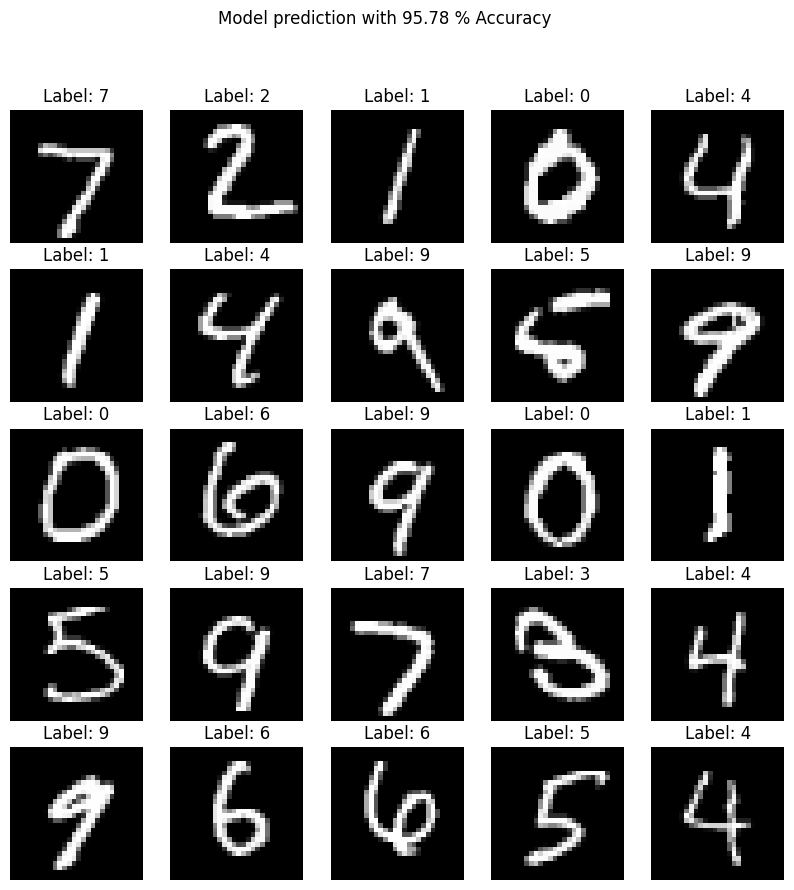

In [57]:
# Display some random images from the training set
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"Label: {test_label_predict[i]}")
    plt.axis('off')
    plt.suptitle('Model prediction with {} % Accuracy'.format(round((test_acc*100),2)))
plt.show()

- Saving trained model

In [46]:
model_json = model.to_json()
# Check if directory exists
if os.path.isdir('saved_model') == False:
    os.mkdir('saved_model')     
# Saving model to JSON
with open("saved_model/MNIST_trained.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("saved_model/MNIST_trained_weights.h5","w")